In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv('news.csv')
dataframe.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
x = dataframe['text']
y = dataframe['label']

In [4]:
x

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [5]:
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

In [8]:
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

In [9]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)

In [41]:
from sklearn.naive_bayes import MultinomialNB
classifier2 = MultinomialNB()
from sklearn import metrics
import numpy as np
import itertools
classifier2.fit(tfid_x_train,y_train)
pred = classifier2.predict(tfid_x_test)
score = metrics.accuracy_score(y_test,pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 83.19%


In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
classifier3.fit(tfid_x_train,y_train)
pred = classifier3.predict(tfid_x_test)
score = metrics.accuracy_score(y_test,pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 91.08%


In [10]:
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [11]:
y_pred = classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.37%


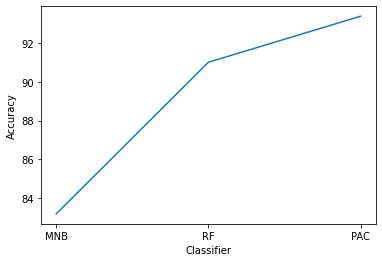

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(['MNB', 'RF', 'PAC'])
y = np.array([83.19, 91.0, 93.37])
plt.plot(x, y)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()
#MNB=Multinomial Naive Bayes
#RF=Random Forest
#PAC=Passive Aggressive

In [12]:
cf = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)

[[571  44]
 [ 40 612]]


In [13]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [14]:
fake_news_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.')

['REAL']


In [15]:
fake_news_det("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [16]:
import pickle
pickle.dump(classifier,open('model.pkl', 'wb'))

In [17]:
# load the model from disk
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [18]:
def fake_news_det1(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    print(prediction)

In [19]:
fake_news_det1("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [20]:
fake_news_det1("""U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.""")

['REAL']


In [21]:
fake_news_det('''U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.''')

['REAL']


In [22]:
fake_news_det("""Two Indian-American women appointed to key positions at US Mission to UN""")

['FAKE']


In [23]:
fake_news_det("""Poll finds Ben Carson knocks Donald Trump from top spot nationally""")

['FAKE']


In [24]:
fake_news_det("""White House: GOP Has Failed to Put ‘Points on the Board""")

['REAL']


In [25]:
fake_news_det("""George W. Bush’s Ethics Lawyer Files Complaint Against FBI Director James Comey""")

['FAKE']


In [26]:
fake_news_det("""Netflix Ceo: TV’s Future includes Hallucination Pills""")

['FAKE']


In [27]:
fake_news_det("""After Debate Duke Says USA becoming Banana Republic""")

['FAKE']


In [28]:
fake_news_det("""Clinton doubles down on disputed claim FBI found her email remarks 'truthful""")

['FAKE']


In [29]:
fake_news_det("""Russia successfully tests its first-ever hypersonic weapon""")

['FAKE']


In [30]:
fake_news_det("""Poll finds Ben Carson knocks Donald Trump from top spot nationally""")

['FAKE']
